# Simulated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pyreadr
root = '../'

In [2]:
#ls_stations = ['Pully_small_storage', 'Pully_large_storage', 'Lugano_small_storage', 'Lugano_large_storage', 'Basel_small_storage']
ls_stations = ['Pully_small_storage']

In [3]:
def show_data(df, max_time_points=24*365, title=None):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    precipitation = df['p'][-max_time_points:]
    dates = df['t'][-max_time_points:]
    pet = df['pet'][-max_time_points:]
    streamflow = df['q'][-max_time_points:]
    # Plot precipitation with inverted y-axis on the first axis
    ax1.plot(dates, precipitation, color='blue', alpha=0.6, label='Precipitation')
    ax1.invert_yaxis()  # Invert the y-axis to make precipitation start from the top
    ax1.set_ylabel('Precipitation (mm)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xlabel('Date')
    
    # Create a second y-axis for PET
    ax2 = ax1.twinx()
    ax2.plot(dates, pet, color='green', label='PET')
    
    ax2.plot(dates, streamflow, color='orange', label='Streamflow')
    # Add a legend to the plot
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
        
    # Adjust layout to avoid overlap
    fig.tight_layout()
    if not(title is None):
        plt.title(title)
    # Display the plot
    plt.show()

In [4]:
def show_ywf(data, site, max_lag=24*3, title=None, K=4):
    ttd_temp = pd.read_csv(os.path.join(root, site, 'data', f'{site}_TTD.csv'),  usecols=np.arange(365*20))
    ttd_temp = ttd_temp.to_numpy()
    ywf_true = np.cumsum(ttd_temp, axis=1)[:,24*30*3]
    meanTTD = np.mean(np.cumsum(ttd_temp, axis=1), axis=0)
    del ttd_temp
    plt.plot(data['t'][-len(ywf_true):], ywf_true)
    plt.title(site, fontsize=14)
    plt.ylabel('Young water fraction (3 months)', fontsize=14)
    plt.xlabel('Time (in hours)', fontsize=14)
    plt.show()
    
    plt.figure()
    plt.plot([i/(24*365) for i in range(len(meanTTD))], meanTTD)
    plt.title(site, fontsize=14)
    plt.ylabel('Average Cumulative TTD', fontsize=14)
    plt.xlabel('Time (in years)', fontsize=14)
    plt.show()

In [5]:
def show_tracers(df, site, max_time_points=24*365):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    precipitation = df['Cp'][-max_time_points:]
    dates = df['t'][-max_time_points:]
    streamflow = df['Cq'][-max_time_points:]
    # Plot precipitation with inverted y-axis on the first axis
    ax1.plot(dates, precipitation, color='blue', alpha=0.6, label='$C_p$')
    ax1.invert_yaxis()  # Invert the y-axis to make precipitation start from the top
    ax1.set_ylabel('Input Concentration', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xlabel('Date')
    
    # Create a second y-axis for PET
    ax2 = ax1.twinx()
    
    ax2.plot(dates, streamflow, color='orange', label='$C_Q$')
    ax2.set_ylabel('Output Concentration', color='orange')

    # Add a legend to the plot
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
        
    # Adjust layout to avoid overlap
    fig.tight_layout()
    plt.title(site)
    # Display the plot
    plt.show()

def show_tracers2(df, site, max_time_points=24*365):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    precipitation = df['Cp'][-max_time_points:]
    dates = df['t'][-max_time_points:]
    streamflow = df['Cq'][-max_time_points:]
    # Plot precipitation with inverted y-axis on the first axis
    ax1.plot(dates, precipitation, color='blue', alpha=0.6, label='$C_p$')
    ax1.invert_yaxis()  # Invert the y-axis to make precipitation start from the top
    ax1.set_ylabel('Concentration', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xlabel('Date')
    
    
    ax1.plot(dates, streamflow, color='orange', label='$C_Q$')
    plt.legend()
        
    # Adjust layout to avoid overlap
    fig.tight_layout()
    plt.title(site)
    # Display the plot
    plt.show()

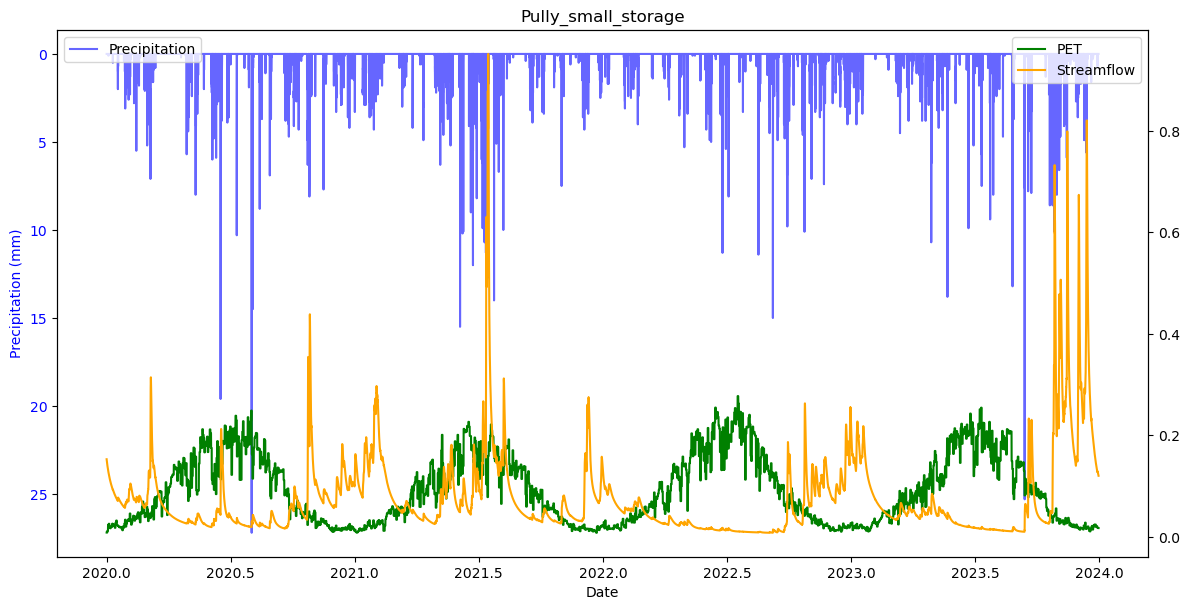

FileNotFoundError: [Errno 2] No such file or directory: '../Pully_small_storage/data/Pully_small_storage_TTD.csv'

In [10]:
for site in ls_stations:
    data = pd.read_csv(os.path.join(root, site, 'data', f'{site}.txt'), sep='\t')
    show_data(data, max_time_points=24*365*4, title=site)
    show_ywf(data, site, max_lag=24*3, title=site)

(376896, 11)


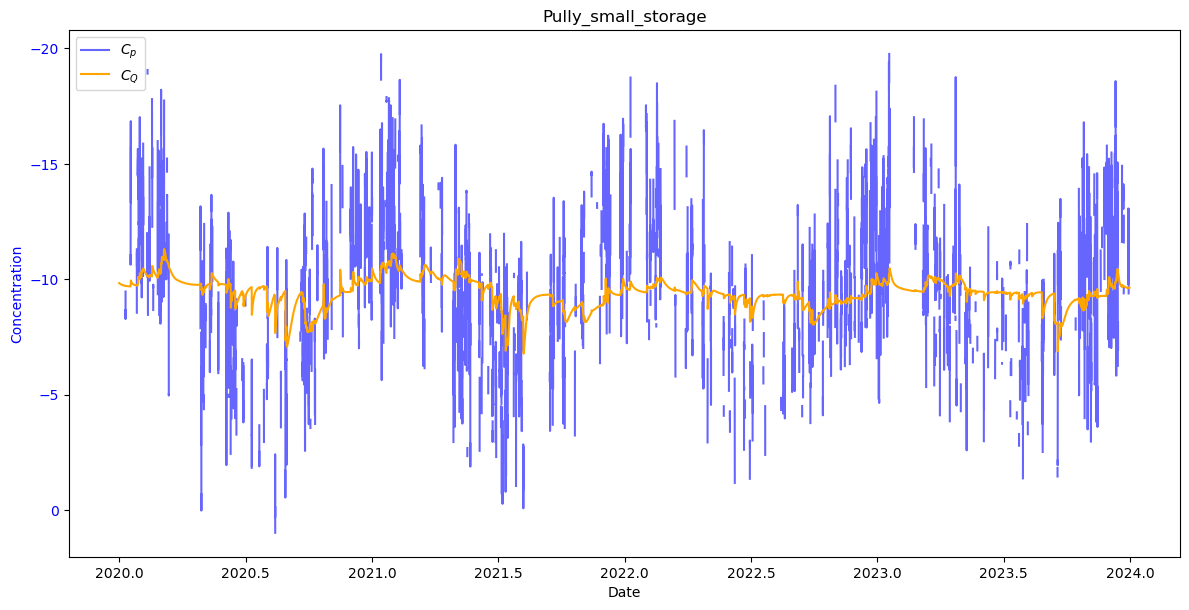

In [11]:
for site in ls_stations:
    data = pd.read_csv(os.path.join(root, site, 'data', f'{site}.txt'), sep='\t')
    print(data.shape)
    show_tracers2(data, site, max_time_points=24*365*4)